Добро пожаловать в 4 лр Замотохиной Марии. Сегодня мы будем анализировать мишек)

In [1]:
import csv
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd

Функция сортировки датасета по метке класса

In [34]:
def filtering(dataframe, class_type):
    class_name = ''
    if (class_type == 1):
        class_name = 'brown_bears'
    if (class_type == 2):
        class_name = 'polar_bears'
    res_dataframe = (dataframe[dataframe.class_name == class_name])
    return res_dataframe

Функция сортировки датасета по метке класса и размерам кратинки

In [25]:
def shape_filtering(dataframe, class_type, max_width, max_hight):
    class_name = ''
    if (class_type == 1):
        class_name = 'brown_bears'
    if (class_type == 2):
        class_name = 'polar_bears'
    print('width = ', max_width)
    print('hight = ', max_hight)
    res_dataframe = (dataframe[dataframe.class_name == class_name][
                     dataframe.image_width <= max_width][dataframe.image_hight <= max_hight])
    return res_dataframe

функция создает массивы для дальнейшего создания гистограммы, выводит картинку, с которой работаем и общие графики распределения цветов

In [16]:
def create_histograma(dataframe, class_type):
    result = [[], [], []]
    print('class_type = ', class_type)
    if (class_type == 1):
        image_index = random.randint(0, 1100)
    if (class_type == 2):
        image_index = random.randint(1100, 2200)
    image_way = filtering(dataframe, class_type)[
        'absolute_way'].loc[image_index]

    image = cv2.imread(image_way)

    cv2.imshow(f'image number {image_index}', image)
    cv2.waitKey(0)

    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])
        result[i] = histr
    plt.gcf().canvas.set_window_title(f'картинка номер {image_index}')
    plt.show()

    return result

функция выводит на экран столбчатую гисторамму заданного цвета
hisrt_data (_type_): массив с данными о цвете(0 элемент - название цвета, 1 элемент - массив со значениями)

In [17]:
def show_histograma(hisrt_data):
    color = hisrt_data[0]
    name_color = hisrt_data[1]

    if name_color == "r":
        plt.hist(color, color="red")
        plt.title("Red color", color="red")
    if name_color == "g":
        plt.hist(color, color="green")
        plt.title("Green color", color="green")
    if name_color == "b":
        plt.hist(color, color="blue")
        plt.title("Blue color", color="blue")
    plt.xlabel("Intensity")
    plt.ylabel("Number of pixels")
    plt.show()

In [ ]:
создание датафрейма

In [2]:
file_name = 'dataset.csv'
class_label = []
class_name = []
absolute_way = []
with open(file_name) as file:
    reader = csv.reader(file)
    for row in reader:
        if row[2] == 'brown_bears':
            class_label.append(0)
        elif row[2] == 'polar_bears':
            class_label.append(1)
        else:
            class_label.append('class label')
        class_name.append(row[2])
        absolute_way.append(row[0])

dataframe = pd.DataFrame(
    {
        class_name[0]: pd.array(class_name[1:]),
        absolute_way[0]: pd.array(absolute_way[1:]),
    }
)

переименование колонок

In [3]:
dataframe = dataframe.rename(
    columns={class_name[0]: 'class_name',
                absolute_way[0]: 'absolute_way'}
)

добавление столбца с меткой класса

In [4]:
dataframe['class_label'] = pd.array(class_label[1:])

Получение необходимой информации об изображениях

Добавление столбца с информацией о высоте, ширине и глубине (количество каналов) изображения

In [5]:
image_width = []
image_hight = []
image_depth = []
pixels_count = []
for way in absolute_way[1:]:
    try:
        image = cv2.imread(way)
        image_width.append(image.shape[1])
        image_hight.append(image.shape[0])
        image_depth.append(image.shape[2])
        pixels_count.append(image.size)
    except BaseException:
        pass
dataframe['image_width'] = pd.array(image_width)
dataframe['image_hight'] = pd.array(image_hight)
dataframe['image_depth'] = pd.array(image_depth)

Долгожданный вывод датафрейма

In [8]:
print(dataframe)

       class_name  \
0     brown_bears   
1     brown_bears   
2     brown_bears   
3     brown_bears   
4     brown_bears   
...           ...   
2195  polar_bears   
2196  polar_bears   
2197  polar_bears   
2198  polar_bears   
2199  polar_bears   

                                                                               absolute_way  \
0     C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0000.jpg   
1     C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0001.jpg   
2     C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0002.jpg   
3     C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0003.jpg   
4     C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0004.jpg   
...                                                                                     ...   
2195  C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\polar_bears

Вывод статистической информации для столбцов, содержащих информацию о размерах изображения (ширина, высота, глубина) и метках класса

In [9]:
print('\nwidth statistic\n', dataframe['image_width'].describe())
print('\nhight statistic\n', dataframe['image_hight'].describe())
print('\ndepth statistic\n', dataframe['image_depth'].describe())
print('\nclass label statistic\n', dataframe['class_label'].describe())



width statistic
 count    2200.000000
mean      445.061364
std        70.594657
min       148.000000
25%       435.500000
50%       480.000000
75%       480.000000
max       480.000000
Name: image_width, dtype: float64

hight statistic
 count    2200.000000
mean      310.901364
std        16.732162
min       228.000000
25%       304.000000
50%       320.000000
75%       320.000000
max       320.000000
Name: image_hight, dtype: float64

depth statistic
 count    2200.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: image_depth, dtype: float64

class label statistic
 count    2200.000000
mean        0.500000
std         0.500114
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: class_label, dtype: float64


Выбор класса, с которым будем работать
Нажмите 1, чтобы выбрать бурых мишек
Нажмите 2, чтобы выбрать полярных мишек

In [22]:
choise = int(input())


print('\nclass_label = ', choise)


input width
input hight

class_label =  1
width =  400
hight =  300


вывод датафрейма, отсортированного по метке класаа

In [35]:
print(filtering(dataframe, choise))

       class_name  \
0     brown_bears   
1     brown_bears   
2     brown_bears   
3     brown_bears   
4     brown_bears   
...           ...   
1095  brown_bears   
1096  brown_bears   
1097  brown_bears   
1098  brown_bears   
1099  brown_bears   

                                                                               absolute_way  \
0     C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0000.jpg   
1     C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0001.jpg   
2     C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0002.jpg   
3     C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0003.jpg   
4     C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0004.jpg   
...                                                                                     ...   
1095  C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears

вывод датафрейма, отсортированного по размерам изображений

In [33]:
print(shape_filtering(dataframe, choise, 300, 400))

width =  300
hight =  400
       class_name  \
40    brown_bears   
59    brown_bears   
60    brown_bears   
68    brown_bears   
71    brown_bears   
...           ...   
1069  brown_bears   
1071  brown_bears   
1073  brown_bears   
1080  brown_bears   
1098  brown_bears   

                                                                               absolute_way  \
40    C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0040.jpg   
59    C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0059.jpg   
60    C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0060.jpg   
68    C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0068.jpg   
71    C:\Users\zamot\OneDrive\Application-programming-laba-1-2\dataset\brown_bears\0071.jpg   
...                                                                                     ...   
1069  C:\Users\zamot\OneDrive\Application-programming-la

C:\Users\zamot\AppData\Local\Temp\ipykernel_3996\2392495346.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_dataframe = (dataframe[dataframe.class_name == class_name][
C:\Users\zamot\AppData\Local\Temp\ipykernel_3996\2392495346.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_dataframe = (dataframe[dataframe.class_name == class_name][


Добавление столбцов с количеством пикселей у изображений и группировка датафрейма по метке класса с вычислением максимального, минимального и среднего значения по количеству пикселей

In [36]:
dataframe['pixels_count'] = pd.array(pixels_count)
print('\nmin pixels\n')
print(dataframe.groupby('class_name').pixels_count.min())
print('\nmax pixels\n')
print(dataframe.groupby('class_name').pixels_count.max())
print('\nmean pixels\n')
print(dataframe.groupby('class_name').pixels_count.mean())


min pixels

class_name
brown_bears    153600
polar_bears    142080
Name: pixels_count, dtype: Int64

max pixels

class_name
brown_bears    460800
polar_bears    460800
Name: pixels_count, dtype: Int64

mean pixels

class_name
brown_bears    413191.854545
polar_bears    415121.890909
Name: pixels_count, dtype: Float64


Формирование данных для построения гистограммы

class_type =  1


C:\Users\zamot\AppData\Local\Temp\ipykernel_3996\2132126157.py:22: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  plt.gcf().canvas.set_window_title(f'картинка номер {image_index}')


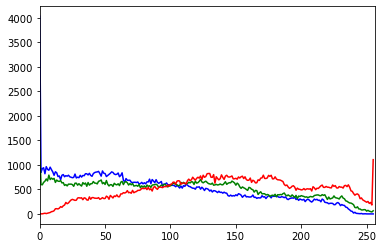

In [37]:
data_for_histograma = create_histograma(dataframe, choise)
about_picture = [(data_for_histograma[0], 'b'),
                 (data_for_histograma[1], 'g'),
                 (data_for_histograma[2], 'r')]

Вывод гистограммы для конкретного цвета

Выберите цвет:
    Нажмите 0, чтобы увидеть синюю гистограмму
    Нажмите 1, чтобы увидеть зеленую гистограмму
    Нажмите 2, чтобы увидеть красную гистограмму

In [38]:
color_choise = int(input())

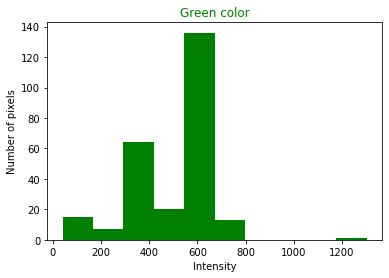

In [39]:
show_histograma(about_picture[color_choise])